In [7]:
#!/usr/bin/env python

import pickle
import os
import sklearn
from scipy import stats, integrate
import pandas as pd
from sklearn import metrics
from itertools import cycle

import matplotlib.pyplot as plt
%matplotlib inline

print(sklearn.__version__)
import numpy as np

import seaborn as sns 
sns.set(color_codes=True)

# How to find cost
home_dir = '~/Documents/thesis/datasets'


def find_cost(predictions, y_test):
    # y_test should be ground truth array
    cost_1_instances = 0
    cost_2_instances = 0
    normal_correct = 0
    anomaly_correct = 0
    for i in range(0, len(predictions)):
        if predictions[i] == 0 and y_test[i] == 1:  # He predicted normal but it was anomaly/breakdown
            cost_2_instances += 1
        elif predictions[i] == 1 and y_test[i] == 0:  # He predicted anomaly/breakdown but it was normal
            cost_1_instances += 1
        elif predictions[i] == 0 and y_test[i] == 0:  # He predicted normal and it was normal
            normal_correct += 1
        elif predictions[i] == 1 and y_test[i] == 1:  # He predicted anomaly/breakdown and it was anomaly/breakdown
            anomaly_correct += 1
    
    accuracy=0
    for i in range(0, len(predictions)):
            if predictions[i] == y_test[i]:
                accuracy += 1
    accuracy = accuracy/len(predictions)
    
    average_precision = metrics.average_precision_score(y_test, predictions)

    #find average precision recall
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    precision, recall, _ = metrics.precision_recall_curve(y_test, predictions)

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
        
    print ("Accuracy of {} is {} %".format(name, round((accuracy)*100, 5)))
    print(("cost_1_instances are {}".format(cost_1_instances)))
    print(("cost_2_instances are {}".format(cost_2_instances)))
    print(("Correct normal predictions are {}".format(normal_correct)))
    print(("Correct anomaly predictions are {}".format(anomaly_correct)))
    print(("Total Cost is {}".format(10 * cost_1_instances + 500 * cost_2_instances)))


# How to make predictions
# Shape of X_test should be N x 170, where N is the number of data points/samples you want to make predictions on
def predict_batch(pickle_name, X_test):
    predictions = []
    with open(pickle_name, 'rb') as f:
        clf = pickle.load(f)
        prediction_prob = clf.predict_proba(X_test)
        print(prediction_prob)
        df = pd.DataFrame(prediction_prob)
          
        #df.to_csv("/home/anastasia/Documents/thesis/datasets/propabilities.csv")
        
        for pr in prediction_prob:
            if pr[0] > 0.95:
                predictions.append(0)  # Normal
            else:
                predictions.append(1)  # anomaly/breakdown
    return predictions



0.19.1


[[0.9960921  0.0039079 ]
 [0.99737575 0.00262425]
 [0.99817036 0.00182964]
 ...
 [0.99719397 0.00280603]
 [0.99759891 0.00240109]
 [0.9975378  0.0024622 ]]
Average precision-recall score: 0.43
Accuracy of L2logistic (OvR) is 97.51219 %
cost_1_instances are 175
cost_2_instances are 24
Correct normal predictions are 7632
Correct anomaly predictions are 168
Total Cost is 13750


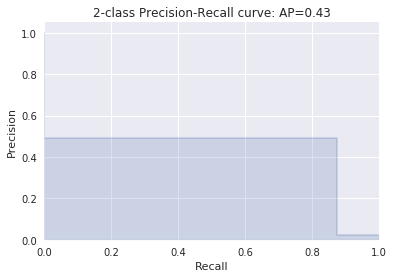

In [8]:
if __name__ == '__main__':
    def preprocess_data(data):
        data = data.replace("na", 0)
        data = data.replace("neg", 0)
        data = data.replace("pos", 1)
        return data


    
    X_test = pd.read_csv(home_dir+'/live_data_a.csv').astype(str)
    X_test = preprocess_data(X_test)
    
    y_test = X_test['class'].astype(int)
    X_test = X_test.drop('class', axis=1)


    name = 'L2logistic (OvR)'
    find_cost(predict_batch('/home/anastasia/Documents/thesis/datasets/new_models/'+name+'.pickle', X_test), y_test)
    